In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ds=pd.read_csv('buy_car.csv')
ds.head()

,Montly Salary,age,Y/N
0,2386,18,0
1,2486,19,0
2,2586,20,0
3,2686,20,0
4,2756,20,0


In [2]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Montly Salary  400 non-null    int64
 1   age            400 non-null    int64
 2   Y/N            400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [3]:
x=ds.iloc[:,:-1].values
y=ds.iloc[:,2].values

In [4]:
#splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [5]:
#fitting Decision Tree Classifier to the training set 
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy',random_state=0) 
classifier.fit(x_train,y_train)
#Entropy is an information theory metric that measures the impurity or uncertainty in a group of observations.
#The Gini Index or Gini Impurity is calculated by subtracting the sum of the squared probabilities of each class from one

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [6]:
#Predict the test set results
y_pred=classifier.predict(x_test)

In [7]:
y_pred,y_test

(array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64),
 array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1], dtype=int64))

In [8]:
#Making Confusion Matrix – to check whether the test set gives the correct result
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[46,  3],
       [ 7, 44]], dtype=int64)

In [9]:
# Finding accuracy
from sklearn.metrics import accuracy_score
AR=accuracy_score(y_test,y_pred)
print(AR)

0.9


In [11]:
# Predicting a value salary=15000 and age=21
y_pred_new=classifier.predict([[15000,21]])
print(y_pred_new)

[0]


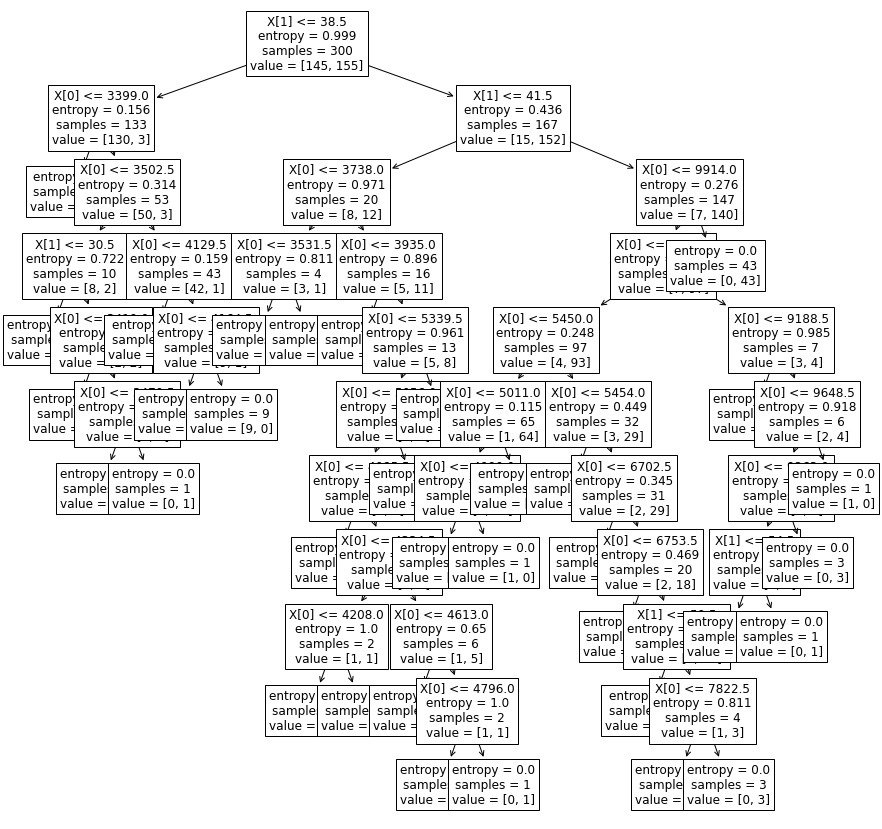

In [12]:
#plot tree
from sklearn import tree
# from matplotlib import pyplot as plt

plt.figure(figsize=(15,15))  # set plot size (denoted in inches)
tree.plot_tree(classifier.fit(x_train,y_train),fontsize=12)
plt.show()